In [1]:
import pandas as pd
import numpy as np

import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud

SELECT_YEAR = 2017

DATA_PATH = './data'
PLOT_PATH = './docs/plots/{}'.format(SELECT_YEAR)

In [37]:
# Data Read
data_file = '{}/{}_lattes.pkl.xz'.format(DATA_PATH, SELECT_YEAR)
%time df = pd.read_pickle(data_file, compression='xz')
print('{} docs shape'.format(df.shape))
df.head(10)

CPU times: user 79.1 ms, sys: 3.04 ms, total: 82.1 ms
Wall time: 84.6 ms
(8652, 4) docs shape


,id,titulo,clean,w_count
0,104124422364023,Exploiting photo location and direction for cl...,"[exploit, photo, locat, direct, cluster, base,...",9
1,104124422364023,A gold-standard social media corpus for urban ...,"[gold, standard, social, media, corpus, urban,...",8
2,104124422364023,A Framework for Spatial Analytics using Hetero...,"[framework, spatial, analyt, use, heterogen, d...",9
3,105670521813027,Gene expression analysis in Musa acuminata dur...,"[gene, express, analysi, musa, acuminata, comp...",12
4,105670521813027,Mitogenome sequence accuracy using different e...,"[mitogenom, sequenc, accuraci, use, differ, el...",7
5,109837868064895,A study of equivalent electrical circuit fitti...,"[studi, equival, electr, circuit, fit, electro...",14
6,116792663386170,DYNAMICS OF CONNECTED VESSELS WITH RUNAWAY REA...,"[dynam, connect, vessel, runaway, reaction, ri...",14
7,116792663386170,VLE BASED DYNAMIC SIMULATION OF A TRICKLE-BED ...,"[vle, base, dynam, simul, trickl, bed, reactor...",13
8,116792663386170,SOLUBILITY BEHAVIOR OF GAMMA-VALEROLACTONE + N...,"[solubl, behavior, gamma, valerolacton, tetrad...",9
9,116792663386170,Removal of amoxicillin from water by adsorptio...,"[remov, amoxicillin, water, adsorpt, onto, act...",25


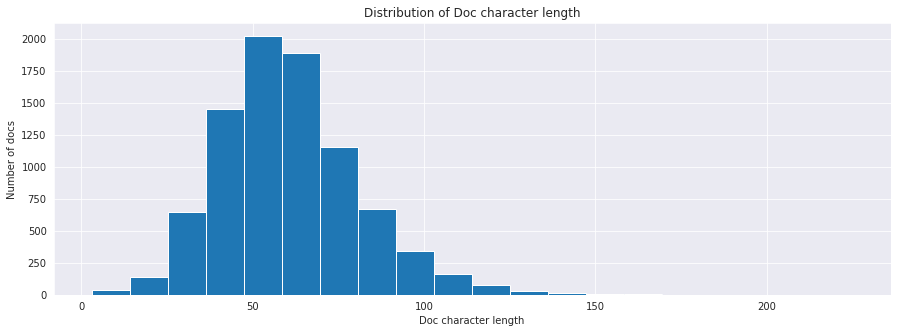

In [40]:
df['clean'] = df['clean'].apply(lambda x: ' '.join(x))

fig = plt.figure(figsize=(15, 5))

doc_lens = [len(d) for d in df.untokened]

plt.hist(doc_lens, bins = 20)
plt.title('Distribution of Doc character length')
plt.ylabel('Number of docs')
plt.xlabel('Doc character length')
plt.show()

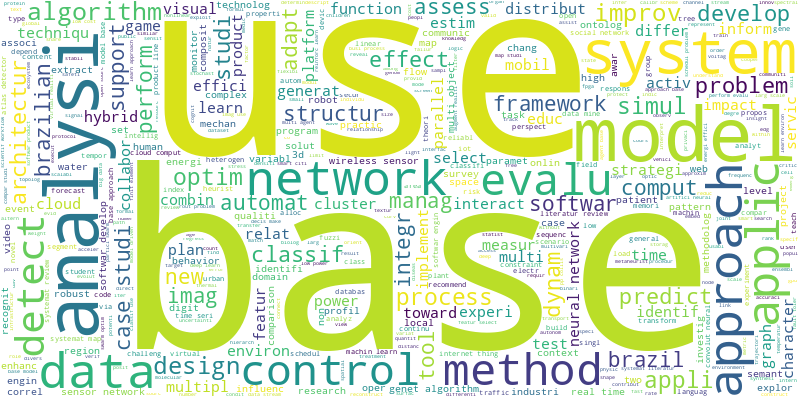

In [41]:
long_string = ' '.join(list(df.untokened.values))

wordcloud = WordCloud(
                width=800, 
                height=400,
                background_color="white",
                max_words=5000,
                contour_width=3,
                contour_color='steelblue'
                ).generate(long_string)

wordcloud.to_image()

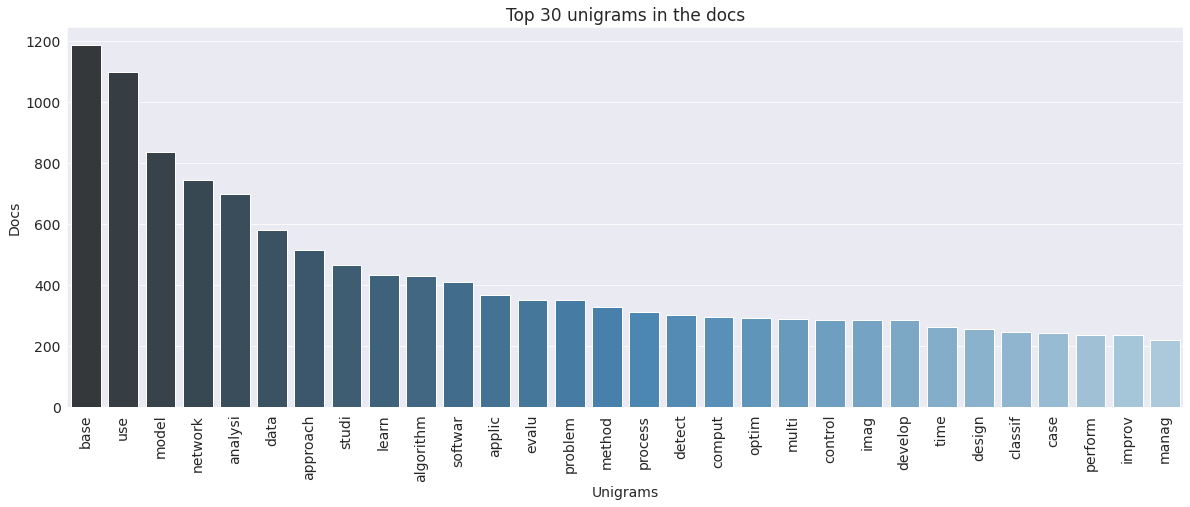

In [42]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df.untokened, 30)
df2 = pd.DataFrame(common_words, columns = ['unigram' , 'count'])

fig = plt.figure(figsize=(20,7))

x = df2['unigram']
y = df2['count']

g = sns.barplot(
    x=x,
    y=y,
    order=x,
    palette='Blues_d'
)

g.set_xticklabels(
    g.get_xticklabels(),
    rotation=90,
    fontsize=14
)

plt.yticks(fontsize=14)
plt.xlabel('Unigrams', fontsize=14)
plt.ylabel('Docs', fontsize=14)
plt.title('Top 30 unigrams in the docs', fontsize=17)

plt.show()
del df2

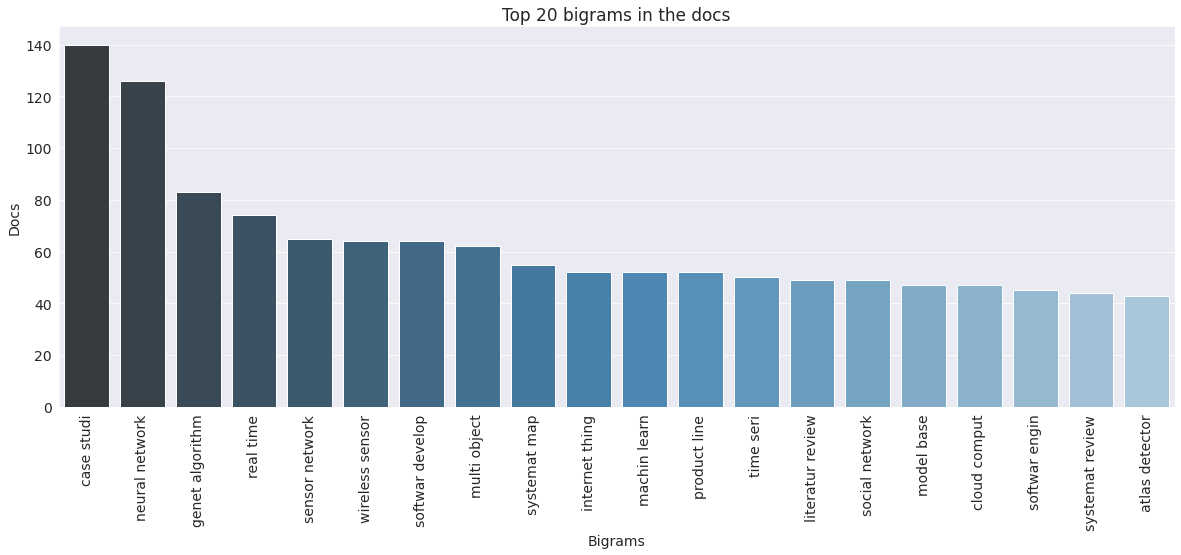

In [43]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(df.untokened, 20)
df3 = pd.DataFrame(common_words, columns = ['bigram' , 'count'])

fig = plt.figure(figsize=(20,7))

x = df3['bigram']
y = df3['count']

g = sns.barplot(
    x=x,
    y=y,
    order=x,
    palette='Blues_d'
)

g.set_xticklabels(
    g.get_xticklabels(),
    rotation=90,
    fontsize=14
)

plt.yticks(fontsize=14)
plt.xlabel('Bigrams', fontsize=14)
plt.ylabel('Docs', fontsize=14)
plt.title('Top 20 bigrams in the docs', fontsize=17)

plt.show()
del df3

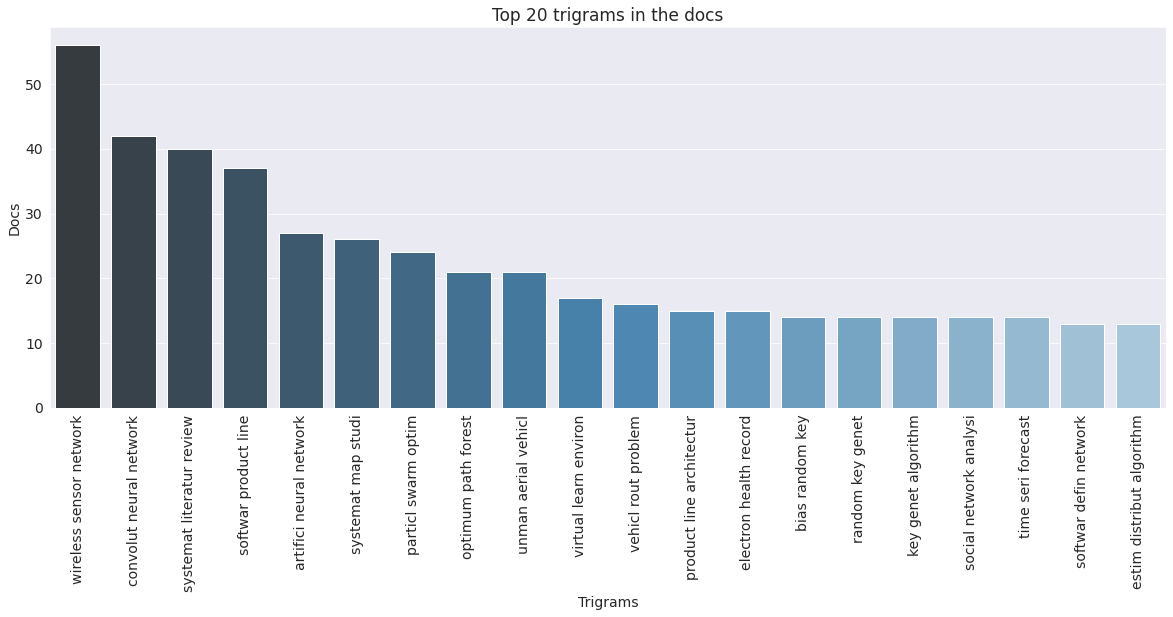

In [44]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_trigram(df.untokened, 20)
df4 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

fig = plt.figure(figsize=(20,7))

x = df4['trigram']
y = df4['count']

g = sns.barplot(
    x=x,
    y=y,
    order=x,
    palette='Blues_d'
)

g.set_xticklabels(
    g.get_xticklabels(),
    rotation=90,
    fontsize=14
)

plt.yticks(fontsize=14)
plt.xlabel('Trigrams', fontsize=14)
plt.ylabel('Docs', fontsize=14)
plt.title('Top 20 trigrams in the docs', fontsize=17)

plt.show()
del df4

In [45]:
vectorizer = CountVectorizer(
    min_df=0.005,
    max_df=0.9,
    stop_words='english',
    lowercase=True,
    #analyzer='word',
    #token_pattern='[a-zA-Z0-9]{3,}',
    ngram_range=(1,3),
    max_features=5000)

data_vectorized = vectorizer.fit_transform(df.clean)

lda_model = LatentDirichletAllocation(
    n_components=20, # Number of topics
    learning_method='online',
    random_state=0,
    n_jobs = -1) # Use all available CPUs

lda_output = lda_model.fit_transform(data_vectorized)

In [46]:
ldavis = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')
pyLDAvis.save_html(ldavis, './docs/LDA-modeling.html')
pyLDAvis.display(ldavis)

In [47]:
# print log-likelihood
print("Log likelihood: ", lda_model.score(data_vectorized))

# print perplexity
print("Perplexity: ", lda_model.perplexity(data_vectorized))

Log likelihood:  -236246.19861580696
Perplexity:  383.0780501011141


In [48]:
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20)

df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['W'+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['T'+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W11,W12,W13,W14,W15,W16,W17,W18,W19
T0,learn,assess,effect,structur,servic,inform,health,diseas,mechan,technolog,genom,influenc,tempor,area,sequenc,studi,manag,knowledg,process,propos
T1,problem,detect,network,object,neural,neural network,experi,use,multi,larg,intellig,multi object,phase,resourc,driven,singl,convolut,general,semi,base
T2,algorithm,test,generat,parallel,genet,impact,genet algorithm,domain,filter,onlin,schedul,profil,load,random,empir,numer,cognit,evolutionari,traffic,reliabl
T3,softwar,tool,graph,engin,qualiti,context,pattern,digit,knowledg,local,investig,type,databas,use,field,scheme,defin,softwar engin,educ,code
T4,design,improv,activ,vehicl,experiment,region,model,explor,water,busi,evolut,protocol,physic,process,assist,analyz,collis,area,atlas,strategi
T5,architectur,brazilian,integr,new,strategi,character,solut,challeng,cell,factor,emerg,constraint,specif,result,base,robot,process,case,use,studi
T6,applic,mobil,dynam,map,systemat,review,awar,fuzzi,user,secur,web,recommend,literatur,logic,systemat map,embed,literatur review,augment,base,studi
T7,method,program,differ,code,path,heurist,use,non,novel,extract,scientif,plant,element,workflow,transfer,protein,rate,base,sequenc,schedul
T8,approach,adapt,linear,rout,task,survey,internet,comparison,alloc,optic,thing,locat,base,internet thing,construct,direct,use,non,environ,algorithm
T9,effici,function,visual,multipl,plan,use,3d,smart,base,project,behavior,oper,fault,urban,point,correl,diagnosi,respons,risk,spatial
